<a href="https://colab.research.google.com/github/Ankit-07-chy/Data-Science/blob/main/262_Task_57_(PCA)_Free.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [1]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [2]:
# Your Code goes Here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
wine.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4244,1,7.6,0.36,0.48,13.5,0.038,44.0,116.0,0.99820,3.04,0.48,9.2,5
6235,0,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
1096,1,6.5,0.28,0.26,8.8,0.040,44.0,139.0,0.99560,3.32,0.37,10.2,6
137,1,7.1,0.37,0.67,10.5,0.045,49.0,155.0,0.99750,3.16,0.44,8.7,5
6213,0,7.5,0.63,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6


In [4]:
wine.shape

(6497, 13)

In [10]:
wine['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [17]:
wine.dropna(inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine['type'] = le.fit_transform(wine['type'])

In [20]:
X = wine.drop('type', axis=1)
y = wine['type']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9891724671307038


In [22]:
# now after applying pca
accuracy = []
for i in range(1,13):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    accuracy.append(ac)
    print("Accuracy:", ac)

Accuracy: 0.979891724671307
Accuracy: 0.9814385150812065
Accuracy: 0.9822119102861562
Accuracy: 0.9860788863109049
Accuracy: 0.9853054911059551
Accuracy: 0.9876256767208044
Accuracy: 0.9876256767208044
Accuracy: 0.988399071925754
Accuracy: 0.9891724671307038
Accuracy: 0.9899458623356535
Accuracy: 0.9899458623356535
Accuracy: 0.9891724671307038


Text(0.5, 1.0, 'Accuracy vs Number of Components')

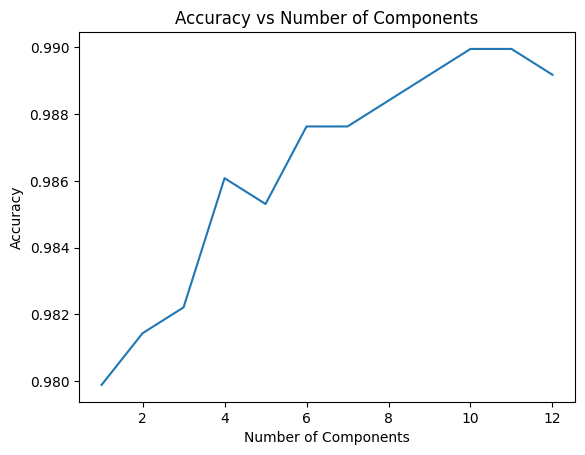

In [23]:
plt.plot(range(1,13), accuracy)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')